In [36]:
import torch
from torch import nn
from d2l import torch as d2l

In [16]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

# VGG块的组成：一个带有3*3的卷积核，padding=1的卷积层 加上一个ReLU，连续堆叠num_convs次
# 然后加上一个2*2，stride为2的最大池化

In [7]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [40]:
def you_VGG(conv_arch):
    final_seq = []
    in_channels = 3
    for block in conv_arch:
        num_convs, out_channels = block
        final_seq.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(*final_seq,
        nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(),
        nn.Dropout(0.5), nn.Linear(4096, 4096), nn.ReLU(),
        nn.Dropout(0.5), nn.Linear(4096, 10)
    )

In [33]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

In [30]:
net = you_VGG(conv_arch)

In [31]:
net

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4):

In [32]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [34]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.181, train acc 0.933, test acc 0.915
1745.4 examples/sec on cuda:0


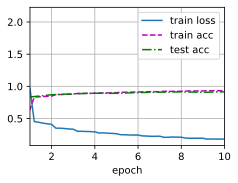

In [37]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [41]:
bigNet = you_VGG(conv_arch)
bigNet


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4):

In [42]:
# dataset
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from src.utils.buildDataset import MyDataset
from src.utils.train import train
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

In [43]:
img_path = r'F:\code\AI\wx_with_ly_DeepLearning_Record\dataset\flower_photos'
data_set = MyDataset(img_path, transform)
train_dataset, test_dataset = random_split(data_set, [0.8, 0.2])
train_iter = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_iter = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

training on cuda
epoch 1, train loss 1.7596736122732577, train acc 0.20231607629427792, test acc 0.18392370572207084
epoch 2, train loss 1.616140620863956, train acc 0.24795640326975477, test acc 0.2506811989100817
epoch 3, train loss 1.6239270503106324, train acc 0.24318801089918257, test acc 0.3024523160762943
epoch 4, train loss 1.5674808388170989, train acc 0.26294277929155313, test acc 0.3569482288828338
epoch 5, train loss 1.4781012107496676, train acc 0.3371934604904632, test acc 0.3923705722070845
epoch 6, train loss 1.419430083554724, train acc 0.3807901907356948, test acc 0.3065395095367847
epoch 7, train loss 1.3724237265794172, train acc 0.41927792915531337, test acc 0.4604904632152589
epoch 8, train loss 1.2826914722504823, train acc 0.4730926430517711, test acc 0.4264305177111717
epoch 9, train loss 1.2407269665728444, train acc 0.49080381471389645, test acc 0.5708446866485014
epoch 10, train loss 1.0917746748613275, train acc 0.5592643051771117, test acc 0.57629427792915

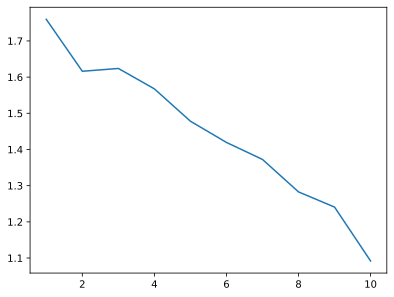

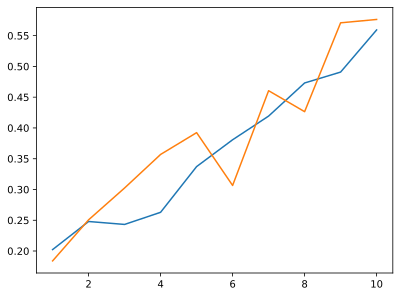

In [44]:
train(bigNet, train_iter, test_iter, num_epochs=10, lr=0.05)